# Pokemon Dataset Exploration

### Author: Xinyu Lu

## Introduction

Pokemon is famous all over the world with millions of fans. I'll use the [Pokemon](https://www.kaggle.com/abcsds/pokemon) dataset to conduct an overall exploration on Pokemon and their own attributes. I got the dataset from Kaggle, and it is an open dataset that allows users to do any analysis. The dataset is 44kb with 721 rows and 12 columns, and I attached the link at the bottom of this page. This is a dataset which includes 721 Pokemon from six generations, and contains 10 attributes including their numbers, names, first and second types, and basic stats:HP, Attack, Defense, Special Attack, Special Defense, and speed. 

Pokemons are very cute, and it is also very interesting to see if there is any relationship between their basic stats. The dashboard I created could help people explore and understand the Pokemon dataset thoroughly. Furthermore, it can also give good suggestions on selecting which type of pokemons under different situations for Pokemon game players.

#### Dataset Description
The attributes contained in this dataset:
1. Name: The English name of each Pokemon. (Data type: String)
2. Type1: The primary type of the Pokemon. Each Pokemon has at least one type, which determines weakness/resistance to attacks from other Pokemon. (Data type: String)
3. Type2: The Secondary type of the Pokemon. Some of the Pokemon are dual type. (Data type: String)
4. Total: The sum of all base data that come after this column. Basically, it can show how strong a pokemon is. (Data type: Number)
5. HP: Base HP value, defines how much damage this pokemon can withstand. (Data type: Number)
6. Attack: Normal Attack value. (Data type: Number)
7. Defense: the base damage resistance agianst normal attack. (Data type: Number)
8. SP Atk: Base special-attack value. (Data type: Number)
9. SP Def: the base damage resistance agianst special-attack. (Data type: Number)
10. Speed: base speed value, determines which pokemon attacks first each round. (Data type: Number)
11. Generation: The generation number of a Pokemon. A generation is a grouping of the Pokémon games that separates them based on the Pokémon they include.(Data type: Number)
12. Legendary: Legendary Pokemon are a group of incredibly rare and often very powerful Pokémon. (Data type: Number)

## Central Visualization

In [1]:
import pandas as pd
import numpy as np
import bqplot
import ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import random
%matplotlib inline

In [2]:
def get_data(path):
    data = pd.read_csv(path)
    return data
data = get_data('Pokemon.csv')

In [3]:
data.columns

Index(['#', 'Name', 'Type1', 'Type2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [4]:
# define two categories, first is from the pokemon dataset attributes, second is two kinds of plots I want to show.
cat1 = ['Type', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
cat2 = ['Count', 'Density','Box']

In [5]:
# first kind of plot which shows count and distribution
def plot_count(col1, col2):
    if col1 == 'Type':
        # analyze type 1 and type 2 at the same time
        type_2_count = data['Type2'].value_counts()
        type_1_count = data['Type1'].value_counts()
        fig, ax = plt.subplots(figsize=(15, 8))
        ax.bar(type_1_count.index, type_1_count.values, color='#b92b27')
        ax.bar(type_1_count.index,type_2_count.values, color='#1565C0')
        ax.set_xlabel('Types of Pokemon')
        ax.set_ylabel('Total number types of Pokemon')
        ax.set_title('Total count types of Pokemon')
        plt.tight_layout()
    else:
        colors = ['#C6FFDD', '#FBD786', '#f7797d', '#373B44', '#4286f4', '#f5af19', '#3b8d99']
        color = colors[random.randint(0,6)]
        fig = data.loc[:, [col1]].hist(bins=20, color=color, linewidth=1.0, xlabelsize=10, ylabelsize=10, xrot=45, yrot=0, figsize=(10,9), grid=False)
        plt.tight_layout(rect=(0, 0, 1.5, 1.5))

# second kind of plot which presents density of legendary and non-legendary pokemons.
def plot_density(col1, col2):
    fig, axes = plt.subplots(figsize=(13, 9))
    
    non_legendary = data[data['Legendary']==False]
    legendary = data[data['Legendary']==True]
    
    # sns.distplot(data[col1], hist=False, color='#ee9ca7', kde_kws={"shade": True})
    sns.distplot(non_legendary[col1], hist=False, color='#86A8E7', kde_kws={"shade": True})
    sns.distplot(legendary[col1], hist=False, color='#11998e', kde_kws={"shade": True})
    fig.legend(labels=['Legendary', 'Non-Legendary'], loc=4)
    plt.tight_layout()

# third kind of plot: determines the best type of pokemon(based on type 1) for each variable using box plot.
def plot_box(col1, col2):
    fig = plt.figure()
    ax = sns.boxplot(y="Type1", x=col1,
            data=data)
    # two lines of code following are guidelines for users to understand better.
    # plt.axvline(df[df['TYPE 1']=='Dragon']['HP'].quantile(.5), ls='--', linewidth=1, color='red')
    # plt.text( (df[df['TYPE 1']=='Dragon']['HP']-14).quantile(.5),18,'Median/Q2')
    plt.tight_layout()

def interactive_plot(df, cat1, cat2):
    if cat1 == 'Type' and cat2 == 'Density':
        print('Sorry, there is no plot for this options.')
    elif cat2 == 'Count':
        plot_count(col1=cat1, col2=cat2)
    elif cat2 == 'Density':
        plot_density(col1=cat1, col2=cat2)
    elif cat1 == 'Type' and cat2 == 'Box':
        print('Sorry, there is no plot for this options.')
    elif cat2 == 'Box':
        plot_box(col1=cat1, col2=cat2)

def dropdown(attribute, plot_type):
    interactive_plot(data, attribute, plot_type)

In [6]:
result = interactive(dropdown, attribute=cat1, plot_type=cat2)

In [7]:
result

interactive(children=(Dropdown(description='attribute', options=('Type', 'Total', 'HP', 'Attack', 'Defense', '…

### Description
The dashboard I created above could help people explore and understand the pokemon dataset thoroughly. 
My dashboard contains two dropdown lists, one is for users to select the attribute that they are interested in to explore, and the other one is the plot type. The second dropdown list contains three options: count, density, and box. That is to say, users can get three kinds of plots using the dashboard. 
The first kind of plot is count plot, which is indeed bar plot, presenting the count and distribution of each variable. The second kind of plot is density plot. And in this kind of graph, I divided the pokemons into two groups: legendary and non-legendary. From density plots, users can get to know the precise distribution of Total, HP, Defense, and other numerical values (except type). Lastly, the box plot helps users to determine the best type of pokemon (based on the primary type: type 1) for each variable. From the box plot plotting 'total' variable, we can see that pokemons whose type 1 is dragon are stronger than other types. 
Overall, the dashboard created above can give good suggestions on selecting which type of pokemons under different situations for pokemon game players.

## Contextual Visualization

The size of the dataset is: (800, 13)


Text(0.5, 1.0, 'Number of Single Type vs Dual Type Pokemon')

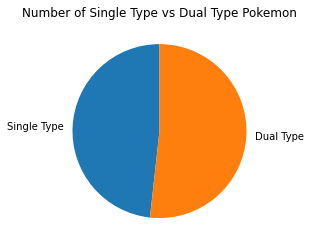

In [8]:
shape = data.shape
print('==========================================')
print('The size of the dataset is:', "\033[1;34m{x}\033[0m".format(x=shape))

# fill the missing values of 'Type2'
data['Type2'].fillna('None', inplace=True)

type1 = data['Type1'].unique()
type2 = data['Type2'].unique()
type1.sort()
type2.sort()
single_type = []
dual_type = []

for i in data.index:
    if data.Type2[i] == 'None':
        single_type.append(data.Name[i])
    else:
        dual_type.append(data.Name[i])
        
num_type1 = len(single_type)
num_type2 = len(dual_type)

ratio_type = [num_type1, num_type2]
plt.pie(ratio_type, labels=['Single Type', 'Dual Type'], startangle=90)
plt.title('Number of Single Type vs Dual Type Pokemon')

This graph shows the proportion of single-type and dual-type pokemons.

The distribution of the Pokemon along generation


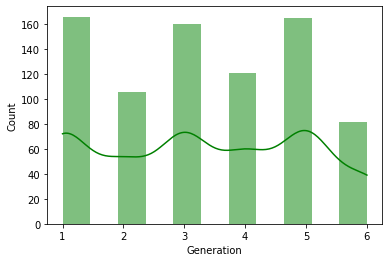

In [9]:
print('==========================================')
print('The distribution of the Pokemon along generation')
generation_hist = sns.histplot(data['Generation'], kde=True, color='g', linewidth=0)

This plot shows the distribution of the number of pokemons belonging to different generation.

## Reference
Dataset: https://www.kaggle.com/abcsds/pokemon